In [406]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [407]:
# columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species'] 

In [408]:
# df = pd.read_csv(r'D:\archive\iris.csv', names=columns)

In [409]:
df = pd.read_csv(r'D:\archive\iris.csv')

In [410]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [411]:
df=df.drop(columns=['Id'])

In [412]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [413]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [414]:
df.info

<bound method DataFrame.info of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [416]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [417]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: >

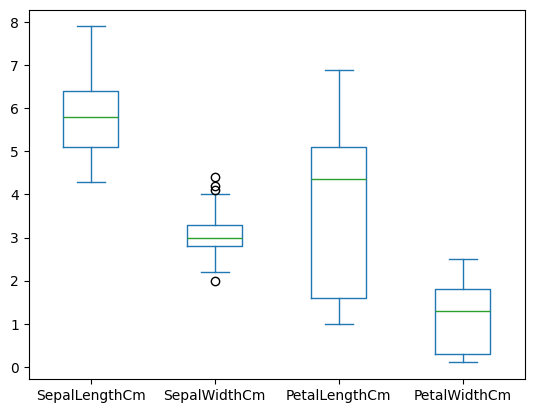

In [418]:
df.plot(kind='box',sharex=False,sharey=False)

<Axes: >

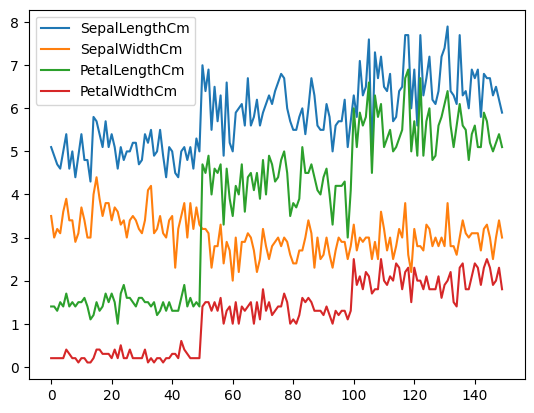

In [419]:
df.plot()

<Axes: >

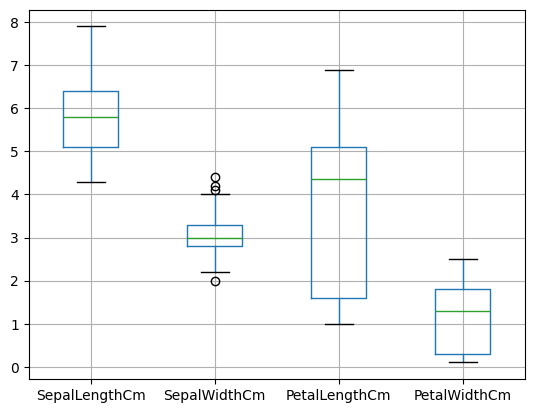

In [420]:
df.boxplot()

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

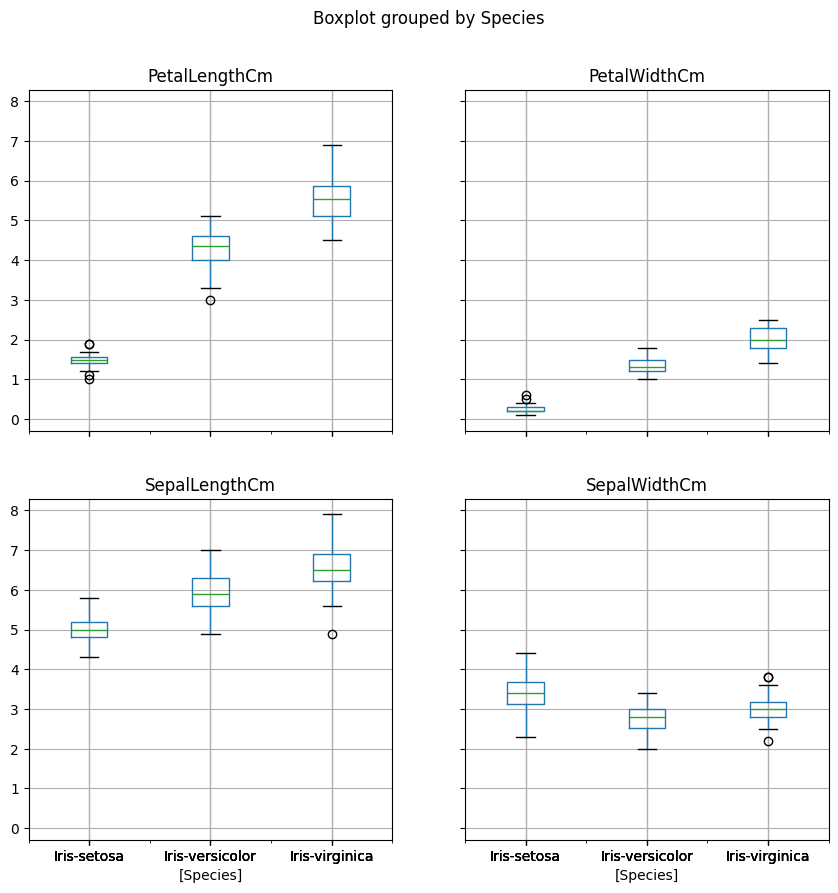

In [421]:
df.boxplot(by="Species",figsize=(10,10))

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

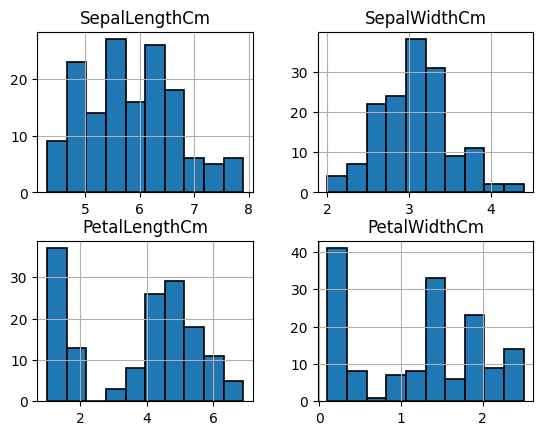

In [422]:
df.hist(edgecolor='black',linewidth=1.2)

<Axes: >

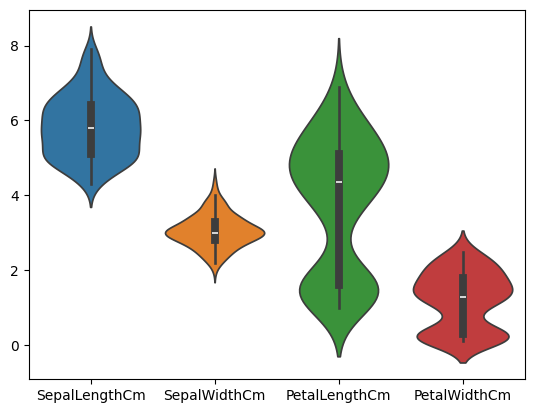

In [423]:
sns.violinplot(data=df)

<Axes: xlabel='Species'>

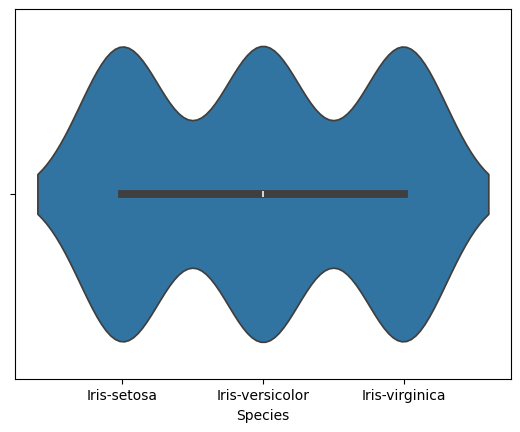

In [424]:
sns.violinplot(data=df,x="Species")

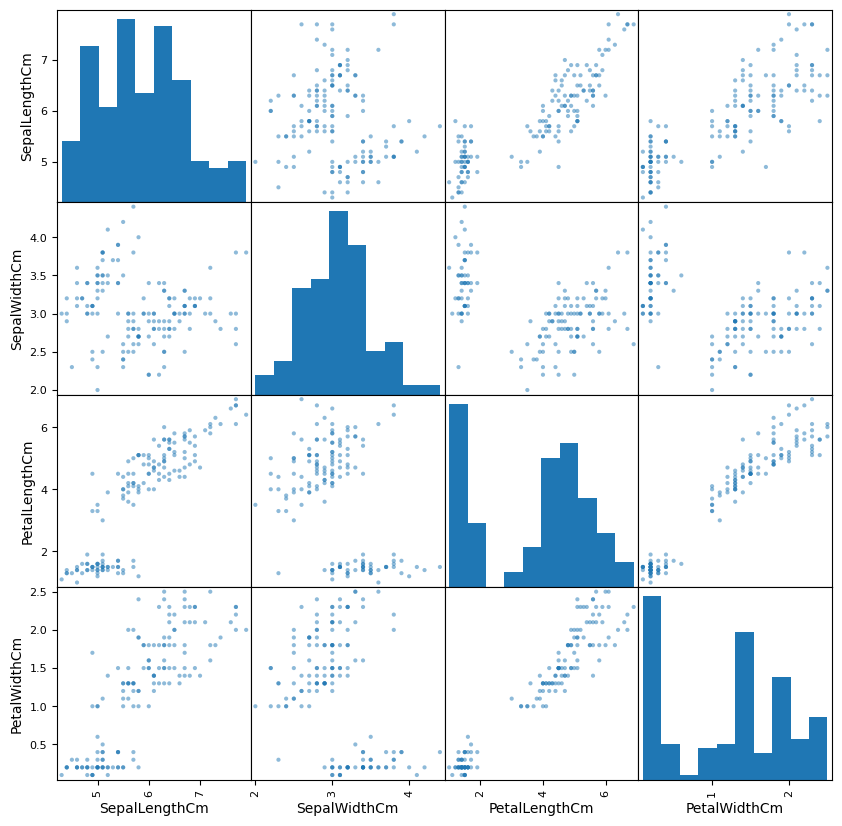

In [425]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(10,10))
plt.show()

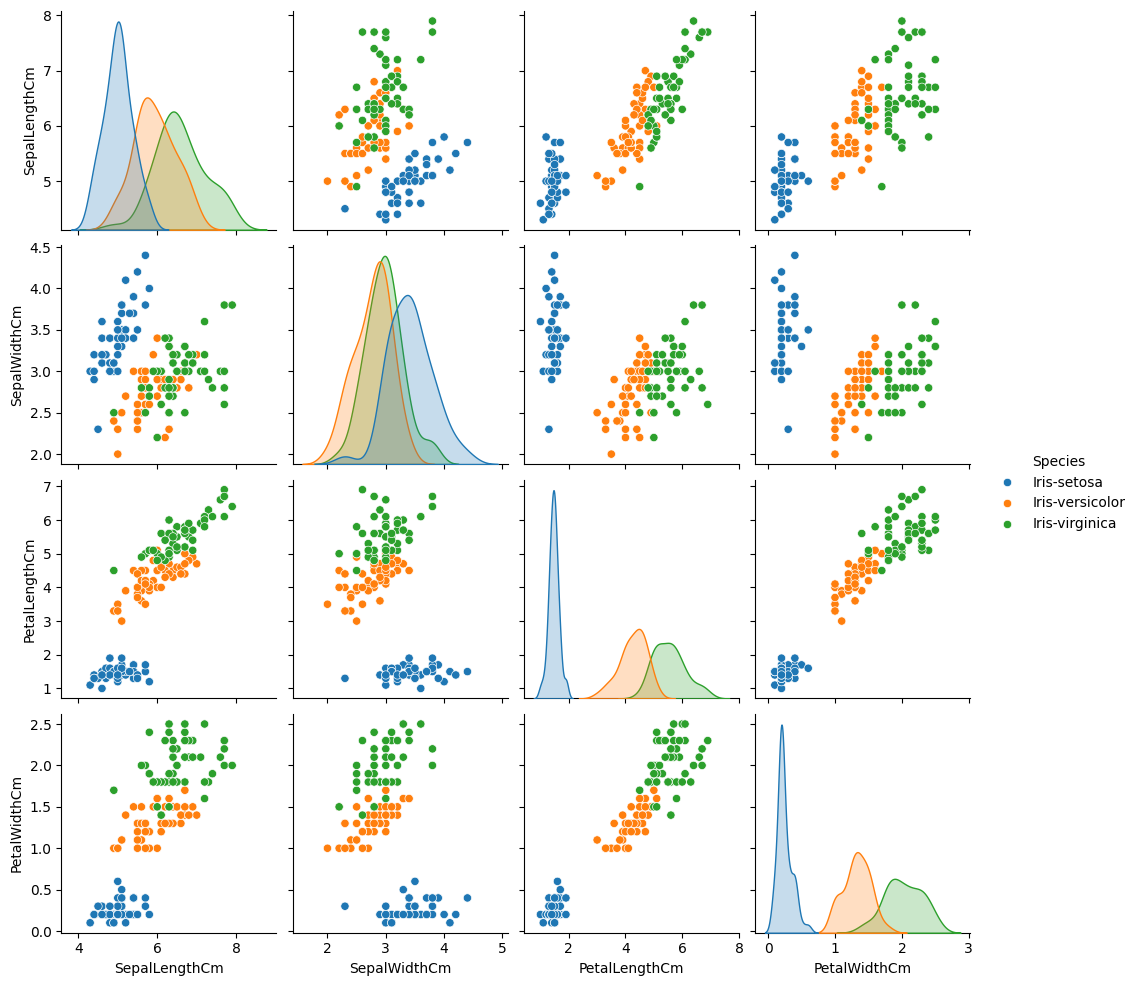

In [426]:
sns.pairplot(df, hue='Species')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


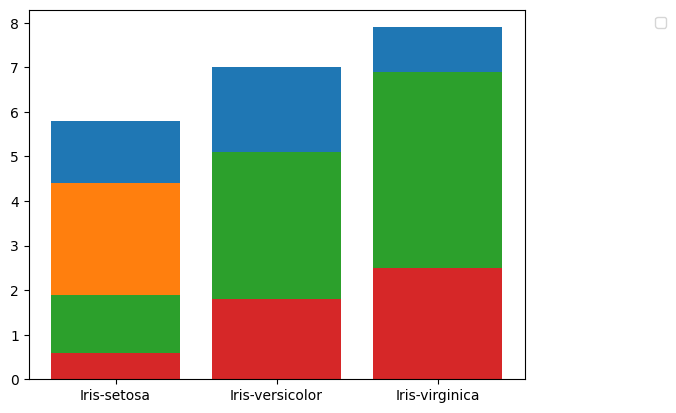

In [427]:
t=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i in t:
    plt.bar(df['Species'],df[i])
plt.legend(bbox_to_anchor=(1.3,1))  

<Axes: >

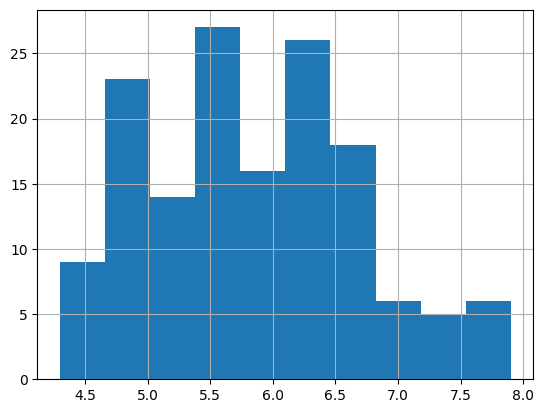

In [428]:
# histograms
df['SepalLengthCm'].hist()

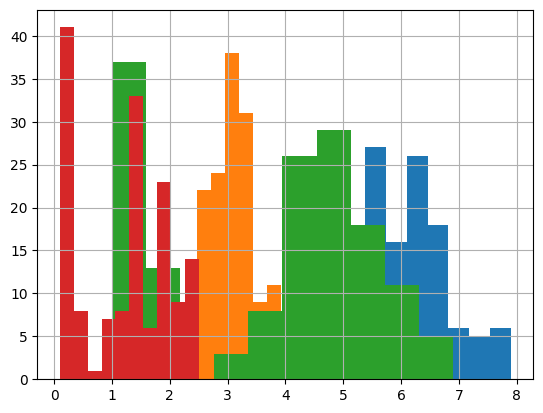

In [429]:
t=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i in t:
    df[i].hist()
    

<Axes: >

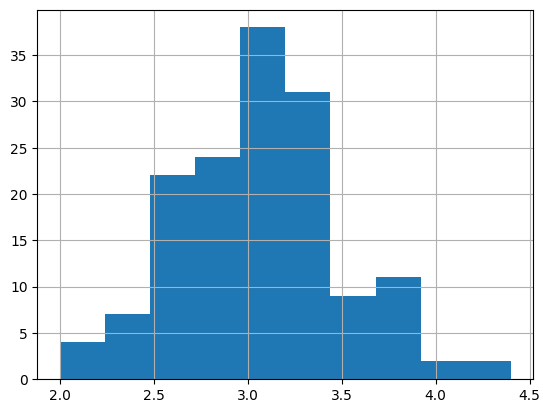

In [430]:
df['SepalWidthCm'].hist()

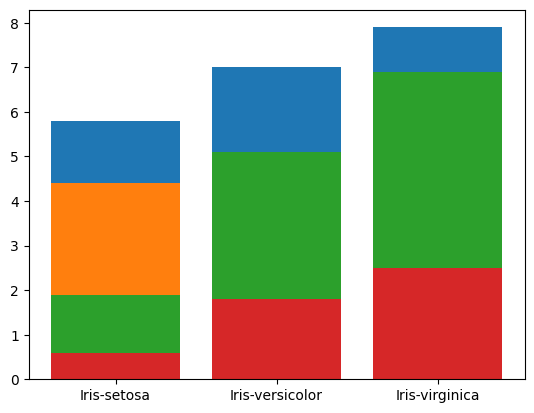

In [431]:
t=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i in t:
    plt.bar(df['Species'],df[i])
    

In [432]:
# plt.bar(X_axis, Y_Data[0], width, label = 'Setosa')
# plt.bar(X_axis+width, Y_Data[1], width, label = 'Versicolour')
# plt.bar(X_axis+width*2, Y_Data[2], width, label = 'Virginica')
# plt.xticks(X_axis, columns[:4])
# plt.xlabel("Features")
# plt.ylabel("Value in cm.")
# plt.legend(bbox_to_anchor=(1.3,1))
# plt.show()

In [433]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Species'],dtype=bool)

In [434]:
one_hot_encoded_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [435]:
correlation_matrix = one_hot_encoded_data.corr()

In [436]:
correlation_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,-0.717416,0.079396,0.638020
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,0.595601,-0.464700,-0.130901
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,-0.922688,0.201587,0.721102
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,-0.887510,0.118376,0.769134
Species_Iris-setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-0.500000,-0.500000
Species_Iris-versicolor,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000,-0.500000
Species_Iris-virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,-0.500000,1.000000


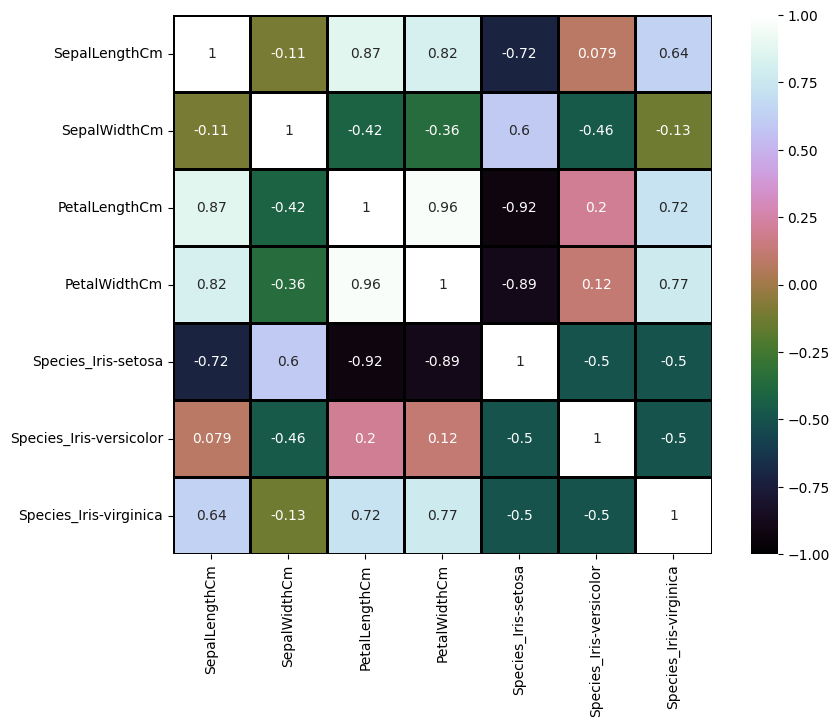

In [437]:
# Step 1: Encode categorical variables
# For example, if you have 'species' column containing categories 'Iris-setosa', 'Iris-versicolor', and 'Iris-virginica'
# You can encode them as numerical values using LabelEncoder from sklearn
# from sklearn.preprocessing import LabelEncoder

 
# df.drop(columns = ['Species'])

# encoder = LabelEncoder()
# df['Species_encoded'] = encoder.fit_transform(df['Species'])
# df.drop(columns=['Species
# Step 2: Compute correlations


# Step 3: Visualize the correlation matrix

fig = plt.gcf()
fig.set_size_inches(10, 7)
sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix', linewidths=1, linecolor='k', square=True, mask=False,
            vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=True)
plt.show()

In [438]:
# one_hot_encoded_data.columns

In [439]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [440]:
# data = one_hot_encoded_data
# X = one_hot_encoded_data.drop(columns=['Species_Iris-setosa', 'Species_Iris-versicolor',
#        'Species_Iris-virginica'])
# Y = one_hot_encoded_data[['Species_Iris-setosa', 'Species_Iris-versicolor',
#        'Species_Iris-virginica']]


In [441]:
# X1=data.drop(columns=['Species_Iris-setosa', 'Species_Iris-versicolor',
#         'Species_Iris-virginica'])
# Y1=data[['Species_Iris-setosa', 'Species_Iris-versicolor',
#      'Species_Iris-virginica']]

In [442]:
X=df.drop("Species",axis=1)
Y=df["Species"]

In [443]:
# data

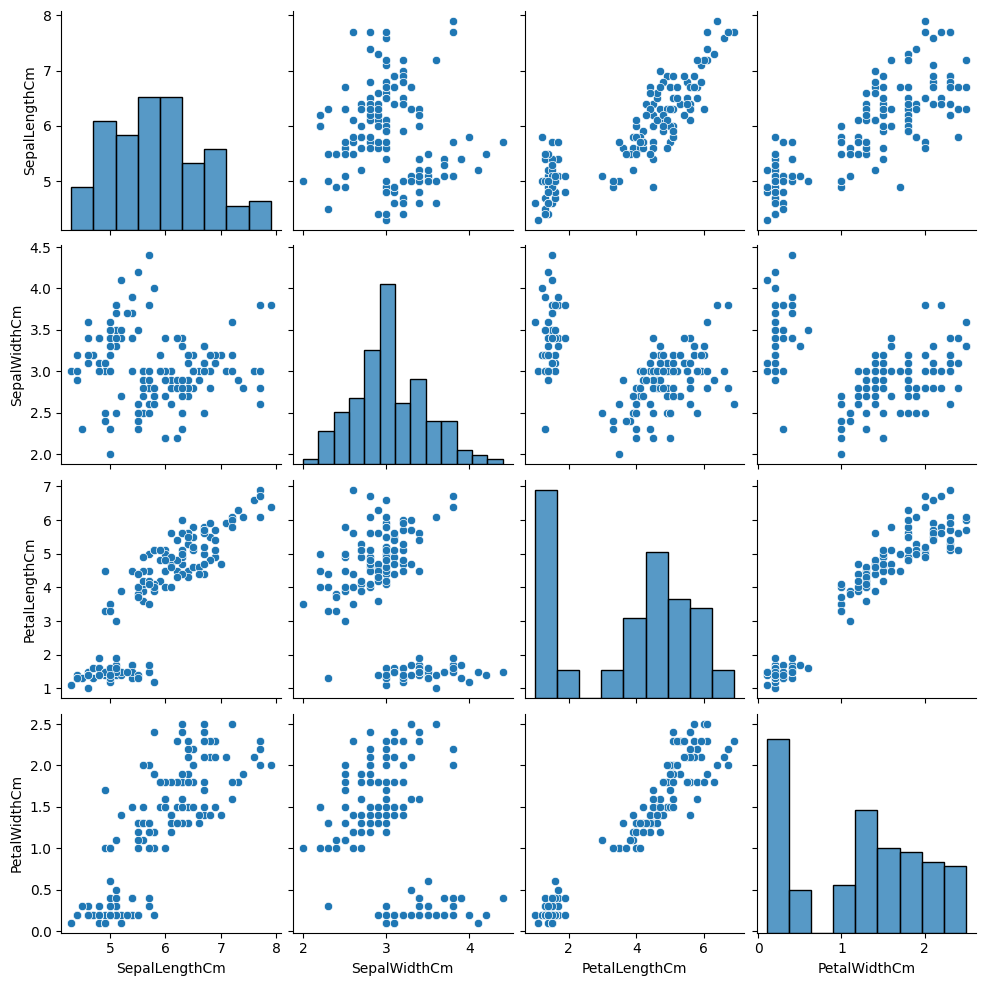

In [444]:
import seaborn as sns
sns.pairplot(df)

In [445]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [446]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [447]:
# # print(df.columns)
# # print(df.head())
# r=Y1.columns
# r=np.array(r)

In [448]:
# r

In [449]:
# df.iloc[0]  # Accessing the first row


In [450]:
# df.iloc[1] 

In [451]:
X_values=X.values

In [452]:
X_values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [453]:
Y_values=Y.values

In [454]:
Y_values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [455]:
# Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])

In [456]:
# Y_Data_reshaped = Y_Data.reshape(4, 3)
# X_axis = np.arange(len(columns)-1)

In [457]:
# width = 0.25

In [458]:
# x1=df.drop(columns=['Species_Iris-setosa', 'Species_Iris-versicolor','Species_Iris-virginica'])
# y1=df[['Species_Iris-setosa', 'Species_Iris-versicolor','Species_Iris-virginica']]

In [459]:
# df.corr()

In [460]:
# df.data

In [461]:
accuracy_scores={}

In [462]:
Catagory_kmeans=['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']

In [463]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [464]:
from sklearn.svm import SVC
svn = SVC()
# Assuming y_train is one-hot encoded
# y_train_labels = np.argmax(y_train, axis=1)

svn.fit(X_train, y_train)

SVC()

In [465]:
# y_train_labels

In [466]:
y_train

10         Iris-setosa
29         Iris-setosa
105     Iris-virginica
79     Iris-versicolor
25         Iris-setosa
            ...       
63     Iris-versicolor
37         Iris-setosa
72     Iris-versicolor
73     Iris-versicolor
7          Iris-setosa
Name: Species, Length: 120, dtype: object

In [467]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
65,6.7,3.1,4.4,1.4
110,6.5,3.2,5.1,2.0
53,5.5,2.3,4.0,1.3
99,5.7,2.8,4.1,1.3
67,5.8,2.7,4.1,1.0
55,5.7,2.8,4.5,1.3
60,5.0,2.0,3.5,1.0
46,5.1,3.8,1.6,0.2
23,5.1,3.3,1.7,0.5
111,6.4,2.7,5.3,1.9


In [468]:
s = svn.predict(X_test)

In [469]:
s

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [470]:
# for i in predictions:
#     print(r[i])

In [471]:
# y_test_labels = np.argmax(y_test, axis=1)

In [472]:
y_test

65     Iris-versicolor
110     Iris-virginica
53     Iris-versicolor
99     Iris-versicolor
67     Iris-versicolor
55     Iris-versicolor
60     Iris-versicolor
46         Iris-setosa
23         Iris-setosa
111     Iris-virginica
80     Iris-versicolor
85     Iris-versicolor
76     Iris-versicolor
56     Iris-versicolor
59     Iris-versicolor
106     Iris-virginica
116     Iris-virginica
11         Iris-setosa
109     Iris-virginica
84     Iris-versicolor
16         Iris-setosa
100     Iris-virginica
129     Iris-virginica
51     Iris-versicolor
14         Iris-setosa
22         Iris-setosa
28         Iris-setosa
27         Iris-setosa
58     Iris-versicolor
102     Iris-virginica
Name: Species, dtype: object

In [473]:
# y_test_labels

In [474]:
# print([r[i]  for i in y_test_labels])

In [475]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,s)*100

96.66666666666667

In [476]:
accuracy_scores["svm"]=accuracy_score(y_test, s)*100

In [477]:
from sklearn.metrics import classification_report
print(classification_report(y_test,s))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [478]:
# X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ],[5.2, 3.4, 1.4, 0.2]])

In [479]:
# X_new

In [480]:
# Create the DataFrame with correct column names
new_data = pd.DataFrame(np.array([[6.7, 6.5, 3.4, 2.9]]), columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

# Check the DataFrame
print(new_data)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            6.7           6.5            3.4           2.9


In [481]:
prediction = svn.predict(new_data)

In [482]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, prediction)*100

In [483]:
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa']


In [484]:
# accuracy_scores={"DecisionTreeClassifier":accuracy_score(y_test, predictions)*100}


In [485]:
# r[[i for i in prediction]]

In [486]:
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)


In [487]:
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(new_data)

array(['Iris-setosa'], dtype=object)

In [488]:
from sklearn import tree

DT=tree.DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [489]:
# from sklearn.tree import export_graphviz
# import graphviz

# export_graphviz(DT, out_file="mytree.dot")
# with open("mytree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

In [490]:
# DT.coef_

In [491]:
# DT.intercept_

In [492]:
DT.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier()>

In [493]:
d = DT.predict(X_test)


In [494]:
d

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

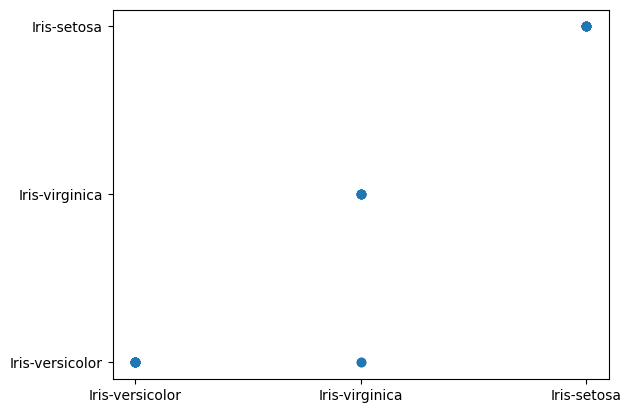

In [495]:
plt.scatter(y_test,d)

In [496]:
# residuals=y_test-predictions

In [497]:
# residuals

In [498]:
# sns.displot(residuals,kind="kde")

In [499]:
# plt.scatter(predictions,residuals)

R square and adjusted R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [500]:
# from sklearn.metrics import r2_score
# score=r2_score(y_test_labels,predictions)
# print(score)

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [501]:
# #display adjusted R-squared
# 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [502]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, d)*100


93.33333333333333

In [503]:
accuracy_scores["DecisionTreeClassifier"]=accuracy_score(y_test, d)*100

In [504]:
from sklearn.metrics import classification_report
print(classification_report(y_test, d))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.88      1.00      0.93        14
 Iris-virginica       1.00      0.75      0.86         8

       accuracy                           0.93        30
      macro avg       0.96      0.92      0.93        30
   weighted avg       0.94      0.93      0.93        30



In [505]:
# X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

In [506]:
prediction = DT.predict(new_data)

In [507]:
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-virginica']


In [508]:
# r[[i for i in prediction]]

In [509]:
import os

In [510]:
# os.environ["PATH"]+= os.pathsep+(r'C:\Users\Gnaneshwari\.conda\envs\myenv\Lib\site-packages\graphviz')
# import graphviz

# vis_data=tree.export_graphviz(DT,out_file=None, feature_names=df.drop(['Species'],axis=1).keys(),class_names=r,filled=True,rounded=True,special_characters=True)
# graphviz.Source(vis_data)

In [511]:
import pickle
with open('DT.pickle', 'wb') as f:
    pickle.dump(svn, f)
with open('DT.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(new_data)

array(['Iris-setosa'], dtype=object)

In [512]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [513]:
k = knn.predict(X_test)

In [514]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, k)*100

96.66666666666667

In [515]:
accuracy_scores["KNeighborsClassifier"]=accuracy_score(y_test, k)*100

In [516]:
from sklearn.metrics import classification_report
print(classification_report(y_test, k))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [517]:
# X_new = np.array([[3, 1, 0.2,1], [  4.9, 3.8, 1.1,0 ], [  5.3,4.6, 1.9,7 ]])

In [518]:
prediction = knn.predict(new_data)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-virginica']


In [519]:
# r[[i for i in prediction]]

In [520]:
import pickle
with open('knn.pickle', 'wb') as f:
    pickle.dump(svn, f)
with open('knn.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(new_data)

array(['Iris-setosa'], dtype=object)

In [521]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=2)
km.fit(X)

KMeans(n_clusters=3, random_state=2)

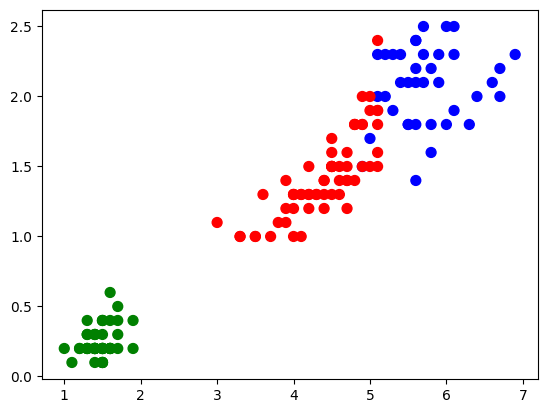

In [522]:
colormap=np.array(['Red','green','blue'])
fig=plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],c=colormap[km.labels_],s=50)

In [523]:
km.labels_.size

150

In [524]:
df['PetalLengthCm']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: PetalLengthCm, Length: 150, dtype: float64

In [525]:
df['PetalWidthCm']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: PetalWidthCm, Length: 150, dtype: float64

In [526]:
centers=km.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [527]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [528]:
Catagory_kmeans=['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']
Catagory_kmeans

['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']

In [529]:
# new_labels=km.labels_
# fig,axes=plt.subplots(1,2,figsize=(16,8))
# axes[0].scatter(X[:,2],X[:,3],c=y,cmap='gist_rainbow',edgecolor='k',s=150)
# axes[1].scatter(X[:,2],X[:,3],c=y,cmap='jet',edgecolor='k',s=150)
# axes[0].set_title('Actual',fontsize=18)
# axes[1].set_title('Predicted',fontsize=18)

In [530]:
#Lets predict on custom input value
# X_km=np.array([[1, 1, 1,9]])
X_km_prediction=km.predict(new_data)
X_km_prediction[0]
print(Catagory_kmeans[int(X_km_prediction[0])])

Iris-Versicolor


In [531]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
logreg = LogisticRegression(max_iter=1000, solver='liblinear')


In [532]:
# model training
logreg.fit(X_train, y_train)
# y_test

LogisticRegression(max_iter=1000, solver='liblinear')

In [533]:
l = logreg.predict(X_test)


In [534]:
l

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [535]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, l)*100


86.66666666666667

In [536]:
accuracy_scores["LogisticRegression"]=accuracy_score(y_test, l)*100

In [537]:
from sklearn.metrics import classification_report
print(classification_report(y_test, l))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.71      0.83        14
 Iris-virginica       0.67      1.00      0.80         8

       accuracy                           0.87        30
      macro avg       0.89      0.90      0.88        30
   weighted avg       0.91      0.87      0.87        30



In [538]:
# X_new = np.array([[ 2, 1, 0.2,1], [2.2, 3.8, 1.1,0 ], [ 2.5, 4.6, 1.9,7 ]])

In [539]:
# prediction = svn.predict(new_data)
# print("Prediction of Species: {}".format(prediction))

In [541]:
prediction = logreg.predict(new_data)

In [542]:
# predictions

In [543]:
print("Prediction of Species: {}".format(prediction))


Prediction of Species: ['Iris-setosa']


In [544]:
# r[[i for i in prediction]]

In [545]:
import pickle
with open('Logistic.pickle', 'wb') as f:
    pickle.dump(svn, f)
with open('Logistic.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(new_data)

array(['Iris-setosa'], dtype=object)

In [546]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

GaussianNB()

In [547]:
g = classifier.predict(X_test)


In [548]:
g

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
      dtype='<U15')

In [549]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, g)*100


96.66666666666667

In [550]:
accuracy_scores["GaussianNB"]=accuracy_score(y_test, g)*100


In [551]:
from sklearn.metrics import classification_report
print(classification_report(y_test, g))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [552]:
# X_new = np.array([[2, 1, 0.2,1], [  4.9, 3.8, 1.1,0 ], [  5.3, 2.5, 1.9,7 ]])


In [553]:
import pickle
with open('GaussianNB.pickle', 'wb') as f:
    pickle.dump(svn, f)
with open('GaussianNB.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(new_data)

array(['Iris-setosa'], dtype=object)

In [554]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [555]:
# model training
rf.fit(X_train, y_train)


RandomForestClassifier()

In [556]:
r = rf.predict(X_test)

In [557]:
r

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [558]:
accuracy_score(y_test, r)*100


96.66666666666667

In [559]:
accuracy_scores["RandomForestClassifier"]=accuracy_score(y_test, r)*100


In [560]:
print(classification_report(y_test, r))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [561]:
# X_new = np.array([[3, 2, 1, 1], [  4.9, 3.8, 1.1,0 ], [  5.3, 2.5, 4.6, 1.9]])


In [562]:
prediction = rf.predict(new_data)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-versicolor']


In [563]:
import pickle
with open('rf.pickle', 'wb') as f:
    pickle.dump(rf, f)
with open('rf.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(new_data)

array(['Iris-versicolor'], dtype=object)

In [564]:
# r[[i for i in prediction]]

In [565]:
accuracy_scores

{'svm': 96.66666666666667,
 'DecisionTreeClassifier': 93.33333333333333,
 'KNeighborsClassifier': 96.66666666666667,
 'LogisticRegression': 86.66666666666667,
 'GaussianNB': 96.66666666666667,
 'RandomForestClassifier': 96.66666666666667}